When P = 0.98
The probability of all the passagers catch the plane : 0.0006940443918461264
The expected value of number of arrivals of passengers : 352.8
When P = 0.99
The probability of all the passagers catch the plane : 0.026833050939885684
The expected value of number of arrivals of passengers : 356.4


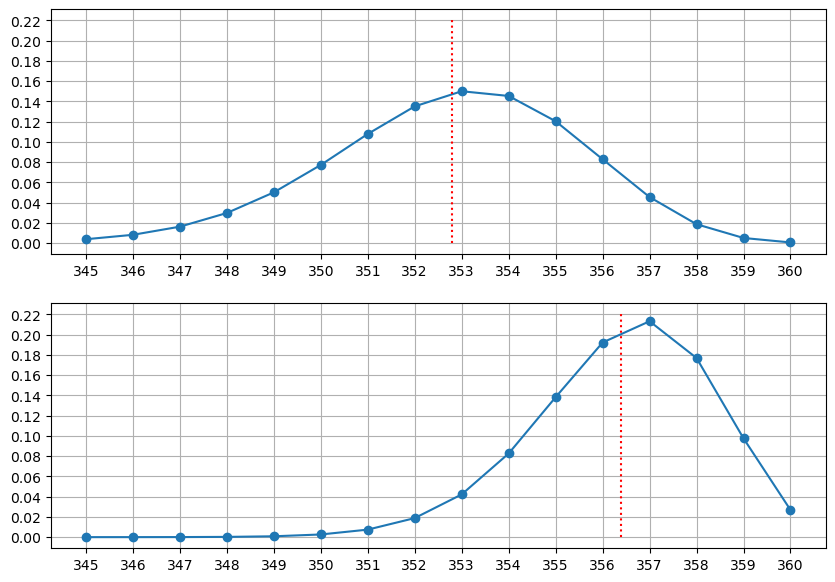

In [96]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import binom

fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 7))

n = 360
p = [0.98, 0.99]
x = np.arange(345, 361)
pmfs = np.zeros((2, 16))
mn = np.zeros(2)

for i in range(0, 2):
    pmfs[i, : ] = binom.pmf(x, n = n, p = p[i])
    mn[i] = binom.mean(n = n, p = p[i])
    axs[i].plot(x, pmfs[i, : ], marker = 'o')
    axs[i].plot(mn[i] * np.ones(2), [0, 0.22], ":", color = 'r')
    axs[i].set_xticks(np.arange(345, 361, step = 1))
    axs[i].set_yticks(np.arange(0, 0.24, step = 0.02))
    axs[i].grid()

    print(f"When P = {p[i]}")
    print(f"The probability of all the passagers catch the plane : {pmfs[i][15]}")
    print(f"The expected value of number of arrivals of passengers : {mn[i]}")

del fig, axs, pmfs

When m = 350
The expected revence is 350000.0
When m = 351
The expected revence is 350995.8378035698
When m = 352
The expected revence is 351962.5402321281
When m = 353
The expected revence is 352826.9774943963
When m = 354
The expected revence is 353451.4324997702
When m = 355
The expected revence is 353652.3188217258
When m = 356
The expected revence is 353253.43188796093
When m = 357
The expected revence is 352144.81326826016
When m = 358
The expected revence is 350314.2961337218
When m = 359
The expected revence is 347839.4845746909


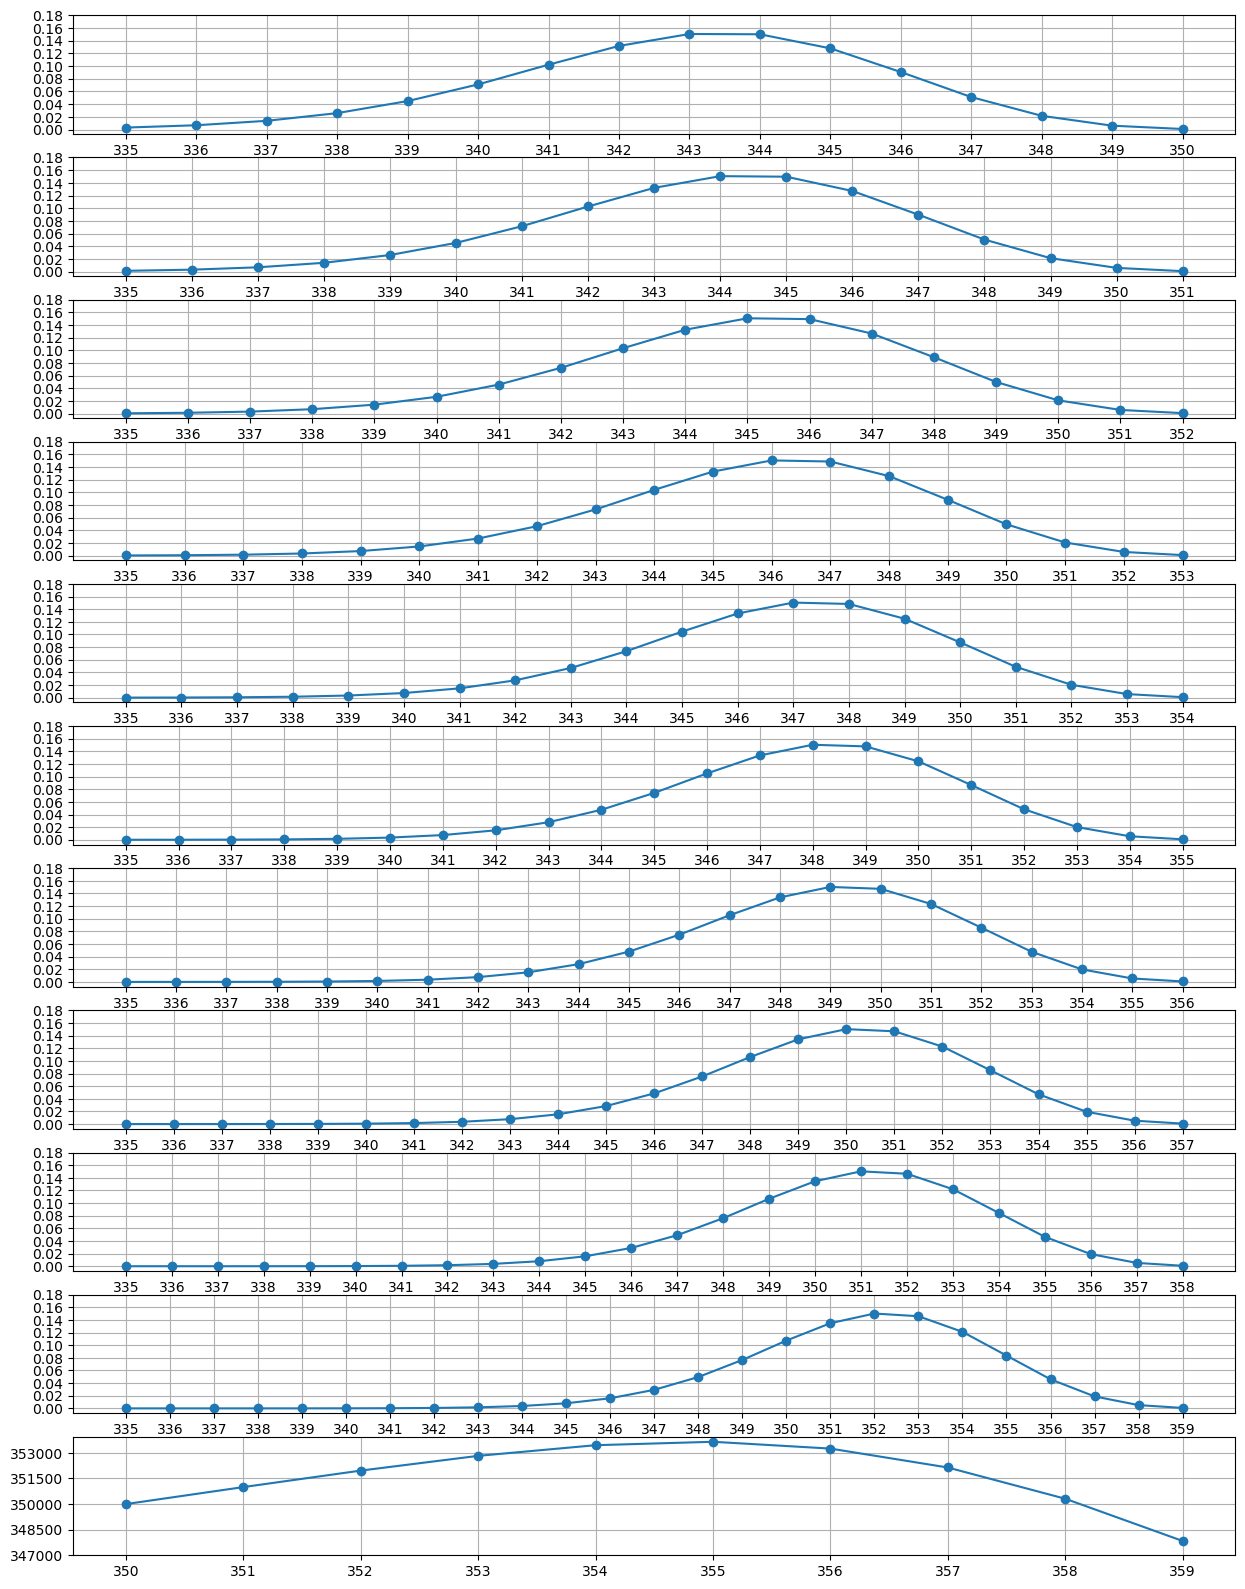

In [98]:
n = 350
ms = np.arange(350, 360)
vl = 1000
fig, axs = plt.subplots(nrows = ms.size + 1, ncols = 1, figsize = (15, 20))
mn = np.zeros(ms.size)
id = 0
st = 335
for m in ms:
    x = np.arange(st, m + 1)
    pmfs = np.zeros(m + 1 - st)
    pmfs[ : ] = binom.pmf(x, n = m, p = p[0])
    
    axs[id].plot(x, pmfs[ : ], marker = 'o')
    mn[id] = m * vl
    for i in range(n + 1, m + 1):
        mn[id] -= pmfs[i - st] * (i - n) * vl * 5
    
    axs[id].set_xticks(x)
    axs[id].set_yticks(np.arange(0, 0.2, step = 0.02))
    axs[id].grid()

    print(f"When m = {m}")
    print(f"The expected revence is {mn[id]}")
    id += 1

axs[id].plot(ms, mn, marker = "o")
axs[id].set_xticks(ms)
axs[id].set_yticks(np.arange(347000, 353601, step = 1500))
axs[id].grid()